# Affichage détaillé des films et évènements au cinéma UGC Ciné Cité La Défense et à l'UGC Les Halles
# Théo JAOUDET

In [1]:
#!pip install selenium
#!pip install lxml
#!pip install beautifulsoup4
#!pip install webdriver-manager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import re 
import requests

import time
from datetime import datetime

## Site utilisé : https://www.ugc.fr/cinema.html?id=20

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.maximize_window()
driver.get("https://www.ugc.fr/cinema.html?id=20") ### UGC LA DEFENSE
#driver.get("https://www.ugc.fr/cinema.html?id=10") ### UGC LES HALLES
time.sleep(2)
driver.find_element('xpath',"//*[@id=\"didomi-popup\"]/div/div/div/span").click()


<ipython-input-2-8140e77c1301>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
cinemas = {}
cinemas['La Defense'] = "https://www.ugc.fr/cinema.html?id=20"
cinemas['Les Halles'] = "https://www.ugc.fr/cinema.html?id=10"

In [5]:
listeType =[]
listeTitres =[]
listeJour =[]
listeHdebut = []
listeHfin = []
listeDuree = []
listeLangue = []
listeCatégorie = []
listeDSortie = []
listeRealisateurs = []
listeActeurs =[]
listeSynopsis = []
listeAvertissement =[]
listeNumSemaines = []
listeTag =[]

### Avant-premières

In [8]:
def avantPrem():
    Type = "Avant-Premières"
    Titres ="AP"
    Jour ="AP"
    Hdebut = "AP"
    Hfin = "AP"
    Duree = "AP"
    Langue = "AP"
    Catégorie = "AP"
    DSortie = "AP"
    Realisateurs = "AP"
    Acteurs ="AP"
    Synopsis = "AP"
    Avertissement = "RAS"
    NumSemaines = "0"
    Tag = "AP"
    
    return Type,Titres,Jour,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag

In [9]:
page_source = driver.page_source
soup = BeautifulSoup(page_source, 'lxml')

try:

    avantpremières = soup.find_all('div',id='avantpremieres-donotmiss-tab')

    for film in avantpremières:
        infosfilms = film.find_all("div",class_="info-wrapper") 
        for info in infosfilms: 
            Type,Titres,Jour,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag = avantPrem()
            date = info.find_all('li',class_="color--dark-blue")
            for d in date: 

                titre = info.find('div',class_="block--title text-uppercase")
                Titres = str(titre.text.strip())

                realisateur = info.find('p',class_="p--medium color--dark-blue")
                real = str(realisateur.text.strip())
                Realisateurs = real[3:]

                tempDate = str(d.find('a').text.strip())
                Jour = tempDate[:-6]
                Hdebut = tempDate[-5:]   
                DSortie = tempDate[:-6]

                synopsis = info.find('p',class_="p--medium color--dark-blue d-none d-md-block")
                Synopsis = synopsis.text.strip()


                listeType.append(Type)
                listeTitres.append(Titres)
                listeJour.append(Jour)
                listeHdebut.append(Hdebut)
                listeHfin.append(Hfin)
                listeDuree.append(Duree)
                listeLangue.append(Langue)
                listeCatégorie.append(Catégorie)
                listeDSortie.append(DSortie)
                listeRealisateurs.append(Realisateurs)
                listeActeurs.append(Acteurs)
                listeSynopsis.append(Synopsis)
                listeAvertissement.append(Avertissement)
                listeNumSemaines.append(NumSemaines)
                listeTag.append(Tag)
except:
    print("Pas d'avant-premières")

### Préventes

In [10]:
def prev():    
    Type = "Prévente"
    Titres ="PV"
    Jour ="PV"
    Hdebut = "PV"
    Hfin = "PV"
    Duree = "PV"
    Langue = "PV"
    Catégorie = "PV"
    DSortie = "PV"
    Realisateurs = "PV"
    Acteurs ="PV"
    Synopsis = "PV"
    Avertissement = "RAS"
    NumSemaines = "0"
    Tag = "PV"
    
    return Type,Titres,Jour,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag

In [11]:
try :
    
    driver.execute_script("window.scrollTo(0, 200)") 
    driver.find_element('xpath',"//*[@id=\"preventes-tab\"]").click()
    time.sleep(2)

    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    
    preventes = soup.find_all('div',id="preventes-donotmiss-tab")

    for film in preventes:
        infosfilms = film.find_all("div",class_="info-wrapper") 
        Type,Titres,Jour,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag = prev()
        for info in infosfilms: 
            titre = info.find('div',class_="block--title text-uppercase")
            Titres = str(titre.text.strip())

            realisateur = info.find('p',class_="p--medium color--dark-blue")
            real = realisateur.text.strip()
            Realisateurs = str(real[3:])

            synopsis = info.find('p',class_="p--medium color--dark-blue d-none d-md-block")
            Synopsis = synopsis.text.strip()


            listeType.append(Type)
            listeTitres.append(Titres)
            listeJour.append(Jour)
            listeHdebut.append(Hdebut)
            listeHfin.append(Hfin)
            listeDuree.append(Duree)
            listeLangue.append(Langue)
            listeCatégorie.append(Catégorie)
            listeDSortie.append(DSortie)
            listeRealisateurs.append(Realisateurs)
            listeActeurs.append(Acteurs)
            listeSynopsis.append(Synopsis)
            listeAvertissement.append(Avertissement)
            listeNumSemaines.append(NumSemaines)
            listeTag.append(Tag)
except : 
    print("Pas de préventes")

Pas de préventes


### UGC Culte

In [12]:
def culte():    
    Type = "UGC Cultes"
    Titres ="Culte"
    Jour ="Culte"
    Hdebut = "Culte"
    Hfin = "Culte"
    Duree = "Culte"
    Langue = "Culte"
    Catégorie = "Culte"
    DSortie = "Culte"
    Realisateurs = "Culte"
    Acteurs ="Culte"
    Synopsis = "Culte"
    Avertissement = "RAS"
    NumSemaines = "RAS"
    Tag = "Culte"
    
    return Type,Titres,Jour,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag

In [13]:
try:
    
    driver.find_element('xpath',"//*[@id=\"ugcculte-tab\"]").click()
    time.sleep(2)

    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')

    ugccultes = soup.find_all('div',id="ugcculte-donotmiss-tab") 

    for film in ugccultes:
        infosfilms = film.find_all("div",class_="info-wrapper") 
        Type,Titres,Jour,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag = culte()
        for info in infosfilms: 
            date = info.find_all('li',class_="color--dark-blue")
            for d in date: 
                titre = info.find('div',class_="block--title text-uppercase")
                Titres = str(titre.text.strip())

                realisateur = info.find('p',class_="p--medium color--dark-blue")
                real = realisateur.text.strip()
                Realisateurs = str(real[3:])

                tempDate = str(d.find('a').text.strip())
                Jour = tempDate[:-6]
                Hdebut = tempDate[-5:]   
                DSortie = tempDate[:-6]

                synopsis = info.find('p',class_="p--medium color--dark-blue d-none d-md-block")
                Synopsis = synopsis.text.strip()


                listeType.append(Type)
                listeTitres.append(Titres)
                listeJour.append(Jour)
                listeHdebut.append(Hdebut)
                listeHfin.append(Hfin)
                listeDuree.append(Duree)
                listeLangue.append(Langue)
                listeCatégorie.append(Catégorie)
                listeDSortie.append(DSortie)
                listeRealisateurs.append(Realisateurs)
                listeActeurs.append(Acteurs)
                listeSynopsis.append(Synopsis)
                listeAvertissement.append(Avertissement)
                listeNumSemaines.append(NumSemaines)
                listeTag.append(Tag)
except : 
    print("Pas de films cultes")

Pas de films cultes


## Films à l'affiche

In [14]:
def ensalle():    
    Type = "En Salle"
    Titres ="ES"
    #Jour ="ES"
    Hdebut = "ES"
    Hfin = "ES"
    Duree = "ES"
    Langue = "ES"
    Catégorie = "ES"
    DSortie = "ES"
    Realisateurs = "ES"
    Acteurs ="ES"
    Synopsis = "ES"
    Avertissement = "RAS"
    NumSemaines = "RAS"
    Tag = "ES"
    
    return Type,Titres,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag

In [15]:
avanceJours = 6 #Nombre de jours à regarder
for countJours in range(1,avanceJours):   
    driver.find_element('xpath',f"//*[@id=\"nav-screening-list\"]/div[2]/div[1]/div/div/div/div/div/div[1]/div/div/div[{countJours}]").click()
    time.sleep(3)
    
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')

    current = soup.find_all('div',class_="slick-slide slick-current slick-active")
    current = current[len(current)-1]
    for d in current:
        Jour = d.find('span',class_="text-uppercase").text.strip()

    allMovies = soup.find_all('div',class_="dates-content") #Toute la page des films
    for movie in allMovies:
        eachMovie = movie.find_all('div',class_="slider-item") #Chaque film tout seul

    for film in eachMovie:

        Type,Titres,Hdebut,Hfin,Duree,Langue,Catégorie,DSortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaines,Tag = ensalle()

        ########## PARTIE DE DROITE ##########

        infoHeure = film.find_all('li',class_="position-relative text-center")
        if(len(infoHeure)==0):
            prochaineSeance = film.find('p',class_="p--medium m-0 color--main-blue").text.strip()   
            tempJour = re.findall('\d.*',prochaineSeance)
            Jour = tempJour[0]
            Hdebut = "A definir"
            Hfin = "A definir"
            Langue = "A definir"

        else:
            seances = film.find_all('li',class_="position-relative text-center")
            for s in seances:
                try:
                    Langue = s.find('span',class_="color--white text-uppercase screening-lang").text.strip()
                except :
                    Langue = s.find('span',class_="color--light-blue text-uppercase screening-lang").text.strip()
                Hdebut = s.find('div',class_="screening-start").text.strip()
                tempHfin = s.find('div',class_="screening-end").text.strip()
                Hfin = tempHfin[5:10]

                ########## PARTIE DE GAUCHE ########## 

                try:
                    NumSemaines = film.find('div',class_="nb-week text-uppercase color--main-blue").text.strip()
                except:
                    NumSemaines = NumSemaines

                Titres = film.find('div',class_="block--title text-uppercase").text.strip()


                infoWrapper = film.find_all('div',class_="info-wrapper main") #Prendre seuelment les infos PC
                for Info in infoWrapper:
                    groupInfo = Info.find_all('div',class_="group-info") #Infos du film

                    for groupinfo in groupInfo: #Pour chaque paragraphe d'infos         
                        if("Sortie le" in groupinfo.text):
                            DSortie = groupinfo.find('span',class_='color--dark-blue').text.strip()
                            categorie = groupinfo.find('p',class_="p--medium color--dark-blue d-none d-md-block").text.strip()
                            Duree = categorie[-5:-1]
                            Catégorie = categorie[:-7]
                        if(" De " in groupinfo.text):
                            groupGens = groupinfo.find_all('p',class_="p--medium color--grey d-none d-md-block")
                            for g in groupGens:
                                if("De" in g.text):
                                    Realisateurs = g.find('span',class_='color--dark-blue').text.strip()
                                if("Avec" in g.text):
                                    Acteurs = g.find('span',class_='color--dark-blue').text.strip()
                        if("Synopsis" in groupinfo.text):
                            Synopsis = groupinfo.find('span',class_="color--dark-blue").text.strip()
                        if("Avertissement" in groupinfo.text):
                            Avertissement = groupinfo.find('span',class_="color--dark-blue").text.strip()

                listeType.append(Type)
                listeTitres.append(Titres)
                listeJour.append(Jour)
                listeHdebut.append(Hdebut)
                listeHfin.append(Hfin)
                listeDuree.append(Duree)
                listeLangue.append(Langue)
                listeCatégorie.append(Catégorie)
                listeDSortie.append(DSortie)
                listeRealisateurs.append(Realisateurs)
                listeActeurs.append(Acteurs)
                listeSynopsis.append(Synopsis)
                listeAvertissement.append(Avertissement)
                listeNumSemaines.append(NumSemaines)
                listeTag.append(Tag)

In [16]:
driver.quit()

## Affichage des films

In [17]:
import pandas as pd


films = pd.DataFrame(list(zip(listeType,listeTitres,listeJour,listeHdebut,
                              listeHfin,listeDuree, listeLangue,listeCatégorie,listeDSortie,
                              listeRealisateurs,listeActeurs,listeSynopsis,listeAvertissement,listeNumSemaines,listeTag)),
                     columns=['Type','Titre','Jour','Début','Fin','Durée','Langue','Catégories','Sortie','Realisateurs','Acteurs','Synopsis','Avertissement','NumSemaine','Tag'])
films

,Type,Titre,Jour,Début,Fin,Durée,Langue,Catégories,Sortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaine,Tag
0,Avant-Premières,ARRETE AVEC TES MENSONGES,20 février 2023,20:00,AP,AP,AP,AP,20 février 2023,Olivier Peyon,AP,Venez découvrir l'adaption du best-seller de P...,RAS,0,AP
1,Avant-Premières,THE FABELMANS,19 février 2023,18:00,AP,AP,AP,AP,19 février 2023,Steven Spielberg,AP,A l'issue de cette avant-première du nouveau f...,RAS,0,AP
2,Avant-Premières,AINBO PRINCESSE D'AMAZONIE,19 février 2023,11:00,AP,AP,AP,AP,19 février 2023,"Richard Claus, Jose Zelada",AP,"En famille, partez à l'aventure avec Ainbo, la...",RAS,0,AP
3,UGC Cultes,LA FIEVRE DU SAMEDI SOIR,19 février 2023,18:00,Culte,Culte,Culte,Culte,19 février 2023,John Badham,Culte,"""Nice move. Did you make that up ?""",RAS,RAS,Culte
4,En Salle,ANT-MAN ET LA GUEPE : QUANTUMANIA,Aujourd'hui,13:15,15:37,2h04,VOSTF,"Action, Science Fiction, Aventure",15 février 2023,Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas",Les super-héros Ant-Man et la Guêpe vont explo...,RAS,Nouveau,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,En Salle,LES TETES GIVREES,Demain,13:20,15:21,1h43,VF,Comédie Dramatique,08 février 2023,Stéphane Cazes,"Clovis Cornillac, Claudia Tagbo, Marwa Merdjet...","Dans un collège au pied du Mont Blanc, les élè...",RAS,RAS,ES
142,En Salle,LES TETES GIVREES,Demain,15:35,17:36,1h43,VF,Comédie Dramatique,08 février 2023,Stéphane Cazes,"Clovis Cornillac, Claudia Tagbo, Marwa Merdjet...","Dans un collège au pied du Mont Blanc, les élè...",RAS,RAS,ES
143,En Salle,LES TETES GIVREES,Demain,17:50,19:51,1h43,VF,Comédie Dramatique,08 février 2023,Stéphane Cazes,"Clovis Cornillac, Claudia Tagbo, Marwa Merdjet...","Dans un collège au pied du Mont Blanc, les élè...",RAS,RAS,ES
144,En Salle,TITANIC,Demain,16:15,19:48,3h15,VF,"Romance, Drame",08 février 2023,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane","Southampton, 10 avril 1912. Le paquebot le plu...",RAS,RAS,ES


In [18]:
#films[(films['Jour']=='Demain')&(films['Début']=='15:30')]

<AxesSubplot:xlabel='Titre'>

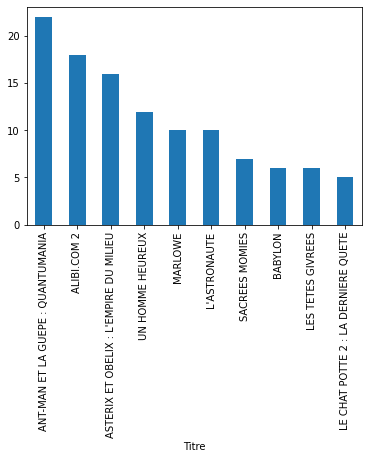

In [19]:
temp = films.groupby("Titre").count().sort_values(by="Type",ascending=False).head(10)
temp['Type'].plot(kind='bar')

In [20]:
films[(films['Jour']=='Demain')&(films['Début']<='10:00')].sort_values(by='Fin',ascending=False)

,Type,Titre,Jour,Début,Fin,Durée,Langue,Catégories,Sortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaine,Tag


In [21]:
films[(films['Jour']=='Demain')&(films['Fin']<='17:00')&(films['Fin']>='16:00')].sort_values(by='Fin',ascending=False)

,Type,Titre,Jour,Début,Fin,Durée,Langue,Catégories,Sortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaine,Tag
86,En Salle,L'ASTRONAUTE,Demain,14:50,16:58,1h50,VF,Comédie Dramatique,15 février 2023,Nicolas Giraud,"Nicolas Giraud, Mathieu Kassovitz, Hélène Vincent","Ingénieur en aéronautique chez ArianeGroup, Ji...",RAS,Nouveau,ES
101,En Salle,BABYLON,Demain,13:25,16:52,3h09,VOSTF,"Drame, Historique",18 janvier 2023,Damien Chazelle,"Brad Pitt, Margot Robbie, Diego Calva",Los Angeles des années 1920. Récit d’une ambit...,Le climat général et quelques scènes sont susc...,5 e semaine,ES
119,En Salle,ZODI ET TEHU FRERES DU DESERT,Demain,14:40,16:46,1h50,VF,"Famille, Comédie, Aventure",08 février 2023,Eric Barbier,"Yassir Drief, Alexandra Lamy, Youssef Hajdi","Zodi, un jeune nomade de 12 ans, découvre dans...",RAS,RAS,ES
106,En Salle,ASTERIX ET OBELIX : L'EMPIRE DU MILIEU,Demain,14:15,16:25,1h52,VF,"Comédie, Aventure",01 février 2023,Guillaume Canet,"Guillaume Canet, Gilles Lellouche, Vincent Cassel",Nous sommes en 50 avant J.C. L’Impératrice de ...,RAS,RAS,ES
75,En Salle,ANT-MAN ET LA GUEPE : QUANTUMANIA,Demain,14:00,16:22,2h04,VF,"Action, Science Fiction, Aventure",15 février 2023,Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas",Les super-héros Ant-Man et la Guêpe vont explo...,RAS,Nouveau,ES
123,En Salle,TIRAILLEURS,Demain,14:10,16:08,1h40,VF,"Drame, Guerre, Historique",04 janvier 2023,Mathieu Vadepied,"Omar Sy, Alassane Diong, Jonas Bloquet",1917. Bakary Diallo s'enrôle dans l'armée fran...,RAS,7 e semaine,ES


In [22]:
films[films["Titre"]=="MAYDAY"]

,Type,Titre,Jour,Début,Fin,Durée,Langue,Catégories,Sortie,Realisateurs,Acteurs,Synopsis,Avertissement,NumSemaine,Tag
